<a href="https://colab.research.google.com/github/Jainspie/Section2_project/blob/main/AI_18_%EB%82%A8%EC%9E%90%EC%9D%B8_Section_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## *SECTION 2 / PROJECT*

---

# 💊AI_18_남자인

목표 : 머신러닝을 통해 건강기능식품 이상사례 발생 위험 예측

## ❗반드시 들어가야 하는 내용

###Part1<br>
- 프로젝트의 목표<br>
 풀고자 하는 문제가 명확하게 제시되었다.<br>
 이 문제를 푸는 것이 왜 가치가 있는지 명확히 제시되었다.<br>
- 데이터셋 선정<br>
 부트캠프 내 데이터셋이 아닌 다른 데이터셋을 활용하였다.<br>
 데이터셋을 선정한 근거가 드러나 있다.<br>
- 머신러닝 문제 정의<br>
 부트캠프 내 문제가 아닌 다른 문제를 정의하고 데이터셋으로부터 문제(회귀 or 분류) 정의 과정을 제시하였다.<br>
 문제 정의에 따른 적절한 타겟을 설정하였다.<br>
 문제를 풀기위해 너무 뻔하지 않은 적절한 가설을 잘 세웠다.<br>
- EDA&전처리<br>
 데이터 분석 과정과 결과 설명이 발표에 나타나 있다.<br>
 데이터를 살펴보고 전처리를 한 과정을 설명하였다.<br>
 EDA를 통해 가설의 타당성을 설명하였다.<br>

###Part 2
- 모델 학습 및 검증<br>
 모델링 이전에 미리 baseline 모델을 선정하였다.<br>
 문제 정의에서 언급한 회귀 / 분류 문제에 맞는 모델을 선택하였다.<br>
 [+] 선택한 모델의 작동 원리 또는 주의할 점 등의 설명을 포함하였다.<br>
 회귀/분류 문제에 따른 적절한 평가지표를 선택하였다.<br>
 2개 이상의 평가지표를 사용하였다.<br>
 [+] 평가지표의 해석법이나 사용 이유 등을 발표에 포함하였다.<br>
 교차검증이나 hold-out을 사용해 데이터셋을 분리하고 모델의 성능 비교 및 향상을 위해 검증 데이터셋을 활용했다.<br>
 모델 최적화를 위한 하이퍼파라미터 튜닝을 진행하였다.<br>
 [+] 비교하고자 하는 하이퍼파라미터의 역할에 대해 이해하고 발표에서 설명하였다.<br>
 모델 결과로서 Test Score(일반화 성능)를 제시하여 모델을 평가하였다.<br>
 테스트셋은 모델의 일반화 성능을 평가하기 위해 한 번만 사용했다.<br>
- 모델 해석<br>
 PDP/SHAP/Feature Importance 등을 활용하여 모델 작동을 설명하였다.<br>
 모델 학습 결과에 대한 논리적 해석이 드러나 있다. (가설 해소 혹은 문제 해결 등)<br>
 [+] 발표의 마지막에 모델 학습 결과에 대한 한계점과 추후 개선사항을 제시하였다.<br>
###Part 3<br>
 제출한 발표 영상의 길이가 5분 이상 10분 이하이다.<br>
 준수한 언어적 전달력 및 영상 상태를 유지할 수 있는 환경에서 영상을 촬영하였다.<br>
비즈니스 상황에 맞는 발표 매너를 준수하였다.<br>
직관적이고 전달력이 높은 발표 자료를 사용하였다.<br>
내용 전달이 가능한 상태의 영상을 제출하였다.<br>

###데이터 셋 설명

In [1]:
#라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 불러오기
import urllib.request

url = 'https://www.fda.gov/media/161096/download'
filename = 'CAERS-Quarterly--20220930-EXCEL.csv'
urllib.request.urlretrieve(url, filename)

df = pd.read_csv(filename, encoding='cp437')  #cp437


df.head()

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME
0,9/30/2022,2022-CFS-014640,NaN,SUSPECT,CENTRUM SILVER MEN'S 50+,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,Foreign body in throat,Other Serious Outcome
1,9/30/2022,2022-CFS-014637,8/26/2022,SUSPECT,YOUNIQUE DAILY YOU LIQUID COLLAGEN SHOT,53,Cosmetics,42.0,year(s),Female,"Abdominal distension, Hypersensitivity, Rash, ...","Life Threatening, Hospitalization"
2,9/30/2022,2022-CFS-014636,NaN,SUSPECT,CITRACAL CALCIUM CITRATE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Choking,"Other Serious or Important Medical Event, Othe..."
3,9/30/2022,2022-CFS-014635,4/14/2022,SUSPECT,TRADER JOE'S GLUTEN FREE OATS,02,Whole Grain/Milled Grain Prod/Starch,40.0,year(s),Female,"Fatigue, Pain, Sluggishness, Vision blurred",Disability
4,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,Mag,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"Fatigue, Pain, Sluggishness, Vision blurred",Disability


In [3]:
df.columns

Index(['DATE_FDA_FIRST_RECEIVED_REPORT', 'REPORT_ID', 'DATE_EVENT',
       'PRODUCT_TYPE', 'PRODUCT', 'PRODUCT_CODE', 'DESCRIPTION', 'PATIENT_AGE',
       'AGE_UNITS', 'SEX', 'CASE_MEDDRA_PREFERRED_TERMS', 'CASE_OUTCOME'],
      dtype='object')

In [4]:
#url = "http://openapi.foodsafetykorea.go.kr/api/374c3aa9270f48fa8d33/I0760/xml/1/8"

###데이터 설명
- DATE_FDA_FIRST_RECEIVED_REPORT : CAERS에 처음 데이터가 입력된 날짜
- REPORT_ID : 각 사례 식별 고유 번호
- DATE_EVENT : 소비자가 부작용을 처음 경험한 보고 날짜
- PRODUCT_TYPE : suspect/concomitant
- PRODUCT : 부작용을 경험한 것으로 보고된 소비자가 사용한 것으로 표시된 약어 브랜드 및/또는 제품 이름
- PRODUCT_CODE : 보고된 제품 유형과 관련된 FDA 산업 코드
- DESCRIPTION : 보고된 제품 유형
- PATIENT_AGE : 부작용을 경험한 소비자 나이
- AGE_UNITS : 나이 단위
- SEX : 성별
- CASE_MEDDRA_PREFERRED_TERMS : MedDRA 우선 용어(국제 표준 부작용 용어)
- CASE_OUTCOME : 부작용 결과과

In [5]:
# 컬럼명 간단하게 변경
df. columns = ['Date_recieved', 'ID', 'Date_event','AE_type','PD', 'PD_code', 'PD_type', 'Age','Age_unit','Sex','MedDRA_PT','Outcome']

###EDA 처리 -  데이터 훑어보기기

In [6]:
df.shape

(192601, 12)

In [7]:
# 데이터 훑어보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192601 entries, 0 to 192600
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date_recieved  192601 non-null  object 
 1   ID             192601 non-null  object 
 2   Date_event     130563 non-null  object 
 3   AE_type        192601 non-null  object 
 4   PD             192600 non-null  object 
 5   PD_code        192601 non-null  object 
 6   PD_type        192601 non-null  object 
 7   Age            127058 non-null  float64
 8   Age_unit       127058 non-null  object 
 9   Sex            183935 non-null  object 
 10  MedDRA_PT      192601 non-null  object 
 11  Outcome        192601 non-null  object 
dtypes: float64(1), object(11)
memory usage: 17.6+ MB


In [8]:
df.describe()

,Age
count,127058.000000
mean,51.870543
std,20.976287
min,1.000000
25%,37.860000
50%,54.000000
75%,67.000000
max,365.000000


In [9]:
# null 값 확인
df.isnull().sum()

Date_recieved        0
ID                   0
Date_event       62038
AE_type              0
PD                   1
PD_code              0
PD_type              0
Age              65543
Age_unit         65543
Sex               8666
MedDRA_PT            0
Outcome              0
dtype: int64

In [10]:
#product type 중 food supplement(54) selection
df.PD_code.value_counts()

54     81158
53     69118
23      5345
29      3231
03      3205
16      2776
24      2707
05      2234
41      2115
09      1834
20      1582
25      1564
37      1433
40      1389
07      1375
31      1130
21      1055
13      1044
34       925
33       913
39       549
12       495
40P      492
45       486
02       464
28       420
27       385
15       370
38       330
22       322
14       300
36       299
17       298
04       253
30       188
41G      171
26       159
35       120
18       113
32        54
52        49
46        45
40N       34
50        32
40C       14
51        14
40M        7
40O        5
Name: PD_code, dtype: int64

In [11]:
#df_s(supplements)
df_s = df.query('PD_code == "54"').reset_index(drop=True)

In [12]:
df_s.shape

(81158, 12)

In [13]:
#결측치 확인
df_s.isna().sum()

Date_recieved        0
ID                   0
Date_event       30583
AE_type              0
PD                   1
PD_code              0
PD_type              0
Age              17767
Age_unit         17767
Sex               3034
MedDRA_PT            0
Outcome              0
dtype: int64

In [14]:
#성별, PD, Age 결측치 제거 (Age 결측치를 제거하는 이유는, 섣불리 mean, mode, median 값을 적용하기 어렵기 때문)
df_s = df_s.dropna(subset=['PD','Sex','Age', 'Age_unit']).reset_index(drop=True)

In [15]:
#나이 단위 확인
df_s.Age_unit.value_counts()

year(s)      61978
month(s)       219
day(s)         111
week(s)         47
decade(s)       16
Name: Age_unit, dtype: int64

In [16]:
# 각 age unit의 year 단위 값 계산
year_dict = {
    'year(s)': 1,
    'decade(s)': 10,
    'day(s)': 1/365,
    'week(s)': 1/52,
    'month(s)': 1/12
}

# age를 year 단위로 변환하는 함수
def convert_to_year(row):
    age = row['Age']
    unit = row['Age_unit']
    return age * year_dict[unit]

# apply 함수를 사용하여 새로운 컬럼 추가
df_s['Age_in_years'] = df_s.apply(convert_to_year, axis=1)

In [17]:
df_s.head()

,Date_recieved,ID,Date_event,AE_type,PD,PD_code,PD_type,Age,Age_unit,Sex,MedDRA_PT,Outcome,Age_in_years
0,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,Mag,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"Fatigue, Pain, Sluggishness, Vision blurred",Disability,40.0
1,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,vitamin c &d,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"Fatigue, Pain, Sluggishness, Vision blurred",Disability,40.0
2,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,zinc,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"Fatigue, Pain, Sluggishness, Vision blurred",Disability,40.0
3,9/30/2022,2022-CFS-014598,9/29/2022,CONCOMITANT,DAILY MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),23.7,year(s),Male,"Abdominal pain upper, Nausea, Vomiting",Other Serious or Important Medical Event,23.7
4,9/30/2022,2022-CFS-014596,9/6/2022,SUSPECT,RITUAL SYNBIOTIC,54,Vit/Min/Prot/Unconv Diet(Human/Animal),35.0,year(s),Female,Hypersensitivity,"Hospitalization, Allergic Reaction",35.0


In [18]:
df_s.shape

(62371, 13)

In [19]:
#MedRA_PT, Outcome 단어 통일
df_s.MedDRA_PT.value_counts().sort_values()

ABDOMINAL PAIN, ABDOMINAL PAIN UPPER, DYSPEPSIA, NAUSEA, VOMITING                               1
Eye swelling, Pruritus, Urticaria                                                               1
Choking, Cough, Dyspnoea, Throat irritation                                                     1
Dizziness, Lip swelling, Nausea, Pruritus, Rash macular, Urticaria                              1
Hypersensitivity, Oropharyngeal pain, Pharyngeal oedema, Rash, Swelling, Throat irritation      1
                                                                                             ... 
Alopecia                                                                                      396
CHOKING, DYSPHAGIA                                                                            464
ALOPECIA                                                                                      571
Choking                                                                                       648
CHOKING             

In [20]:
df_s.Outcome.value_counts().sort_values()

Life Threatening, Hospitalization, Required Intervention, Disability, Congenital Anomaly                    1
Life Threatening, Hospitalization, Visited Emergency Room, Other Serious Outcome                            1
Death, Life Threatening, Visited Emergency Room, Visited a Health Care Provider                             1
Life Threatening, Hospitalization, Required Intervention, Disability, Visited a Health Care Provider        1
Death, Life Threatening, Hospitalization, Disability, Visited Emergency Room                                1
                                                                                                        ...  
Other Serious or Important Medical Event, Visited Emergency Room                                         2909
Other Outcome                                                                                            4419
Hospitalization                                                                                          5299
Other Seri

In [21]:
df_s['MedDRA_PT'] = df_s['MedDRA_PT'].str.lower()
df_s['Outcome'] = df_s['Outcome'].str.lower()

In [22]:
df_s_split = df_s.MedDRA_PT.str.split(',', expand =True)
df_s_split.head(4)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,fatigue,pain,sluggishness,vision blurred,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,fatigue,pain,sluggishness,vision blurred,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,fatigue,pain,sluggishness,vision blurred,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,abdominal pain upper,nausea,vomiting,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
df_s_split.isna().sum()

0         0
1     13475
2     25907
3     36146
4     43710
      ...  
66    62367
67    62367
68    62367
69    62367
70    62367
Length: 71, dtype: int64

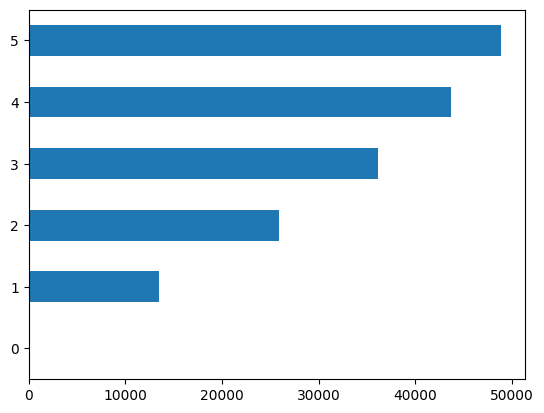

In [24]:
df_s_split.isna().sum()[0:6].plot(kind = 'barh')
plt.show()

### fill na로 결측치를 처리할 경우, 10000여개의 데이터가 na 값으로 처리되어지고, 높은 cardiology가 발생하기 때문에 과감하게 1순위 PT를 제외하고 제외하기로 함.

In [25]:
#df_s_split 의 결측치 열 제거
df_s_split = df_s_split.dropna(axis=1)
df_s_split

,0
0,fatigue
1,fatigue
2,fatigue
3,abdominal pain upper
4,hypersensitivity
...,...
62366,blister
62367,cardiac failure
62368,diarrhoea
62369,coronary artery dissection


In [26]:
df_s['MedDra_PT1'] = df_s_split

### Outcome 도 마찬가지로 fill na로 결측치를 처리할 경우, 30000여개의 데이터가 na 값으로 처리되어지고, 높은 cardiology가 발생하기 때문에 과감하게 중요도도 1순위 PT를 제외하고 나머지 값을 제외하기로 함.

In [27]:
#Outcome 에 따른 증상 나누기
df_s_O = df_s.Outcome.str.split(',', expand =True)
df_s_O.head(4)

,0,1,2,3,4,5,6
0,disability,None,None,None,None,None,None
1,disability,None,None,None,None,None,None
2,disability,None,None,None,None,None,None
3,other serious or important medical event,None,None,None,None,None,None


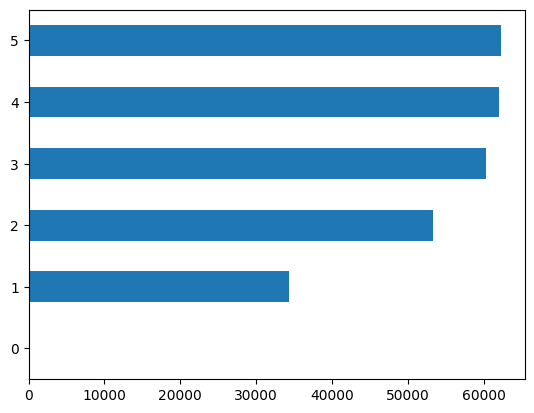

In [28]:
df_s_O.isna().sum()[0:6].plot(kind = 'barh')
plt.show()

In [29]:
#df_s_O 의 결측치 열 제거
df_s_O = df_s_O.dropna(axis=1)
df_s_O

,0
0,disability
1,disability
2,disability
3,other serious or important medical event
4,hospitalization
...,...
62366,visited emergency room
62367,death
62368,other outcome
62369,life threatening


In [30]:
df_s['Outcome1'] = df_s_O

In [31]:
df_s

,Date_recieved,ID,Date_event,AE_type,PD,PD_code,PD_type,Age,Age_unit,Sex,MedDRA_PT,Outcome,Age_in_years,MedDra_PT1,Outcome1
0,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,Mag,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"fatigue, pain, sluggishness, vision blurred",disability,40.0,fatigue,disability
1,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,vitamin c &d,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"fatigue, pain, sluggishness, vision blurred",disability,40.0,fatigue,disability
2,9/30/2022,2022-CFS-014635,4/14/2022,CONCOMITANT,zinc,54,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,year(s),Female,"fatigue, pain, sluggishness, vision blurred",disability,40.0,fatigue,disability
3,9/30/2022,2022-CFS-014598,9/29/2022,CONCOMITANT,DAILY MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),23.7,year(s),Male,"abdominal pain upper, nausea, vomiting",other serious or important medical event,23.7,abdominal pain upper,other serious or important medical event
4,9/30/2022,2022-CFS-014596,9/6/2022,SUSPECT,RITUAL SYNBIOTIC,54,Vit/Min/Prot/Unconv Diet(Human/Animal),35.0,year(s),Female,hypersensitivity,"hospitalization, allergic reaction",35.0,hypersensitivity,hospitalization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62366,7/2/2003,86645,6/24/2003,CONCOMITANT,VITAMIN C,54,Vit/Min/Prot/Unconv Diet(Human/Animal),48.0,year(s),Female,"blister, burning sensation, erythema, pruritus",visited emergency room,48.0,blister,visited emergency room
62367,6/23/2003,72417,NaN,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Male,"cardiac failure, death","death, visited a health care provider",50.0,cardiac failure,death
62368,3/14/2003,67216,1/3/2003,SUSPECT,GNC WOMEN'S PRENATAL WITH IRON,54,Vit/Min/Prot/Unconv Diet(Human/Animal),31.0,year(s),Female,"diarrhoea, feeling abnormal, nausea, vomiting",other outcome,31.0,diarrhoea,other outcome
62369,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"coronary artery dissection, coronary artery em...","life threatening, hospitalization",50.0,coronary artery dissection,life threatening


###불필요한 컬럼 제거거

In [32]:
#불필요한 컬럼 제거
#ID, PD_code, PD_type, Age, Age_unit, MedDRA_PT, Outcome
unused = ['ID', 'PD_code', 'PD_type', 'Age', 'Age_unit', 'MedDRA_PT', 'Outcome']
df_s_f = df_s.drop(labels = unused, axis =1)
df_s_f.shape

(62371, 8)

In [33]:
df_s_f.Outcome1.unique()

array(['disability', 'other serious or important medical event',
       'hospitalization', 'life threatening', 'death', 'other outcome',
       'visited emergency room', 'other serious outcome',
       'required intervention', 'visited a health care provider',
       'allergic reaction', 'congenital anomaly'], dtype=object)

In [34]:
df_s_f.Outcome1.value_counts()

other serious or important medical event    30695
hospitalization                             14833
life threatening                             4996
other outcome                                4419
disability                                   2623
visited a health care provider               1439
death                                        1053
other serious outcome                         946
required intervention                         719
visited emergency room                        618
congenital anomaly                             25
allergic reaction                               5
Name: Outcome1, dtype: int64

Serious Adverse Event(FDA)<br>
(https://www.fda.gov/safety/reporting-serious-problems-fda/what-serious-adverse-event)
- Death : 사망
- Life-threatening : 생명위협

- Hospitalization : 입원
- Disability : 장애
- Congenital Anomaly : 선천적 기형 유발
- other serious or important medical event : 기타 심각한 중요 의료 사건(외과적 치료 필요)
- Other serious outcome : 상동
- required intervention : 치료 개입 필요(중요하다고 임의 판단하였음)


In [35]:
#Serious Adverse Event(SAE)를 숫자로 변환
SAE = ['death',
       'life threatening',
       'hospitalization',
       'disability',
       'required intervention',
       'congenital anomaly',
       'other serious outcome',
       'other serious or important medical event' ]
n_SAE = ['other outcome', 'visited emergency room', 'visited a health care provider', 'allergic reaction']
df_s_f['Outcome1'] = df_s_f['Outcome1'].replace(SAE, 0) \
                                .replace(n_SAE, 1)

In [36]:
df_s_f.shape

(62371, 8)

### 데이터 준비

0    55890
1     6481
Name: Outcome1, dtype: int64
0    0.89609
1    0.10391
Name: Outcome1, dtype: float64


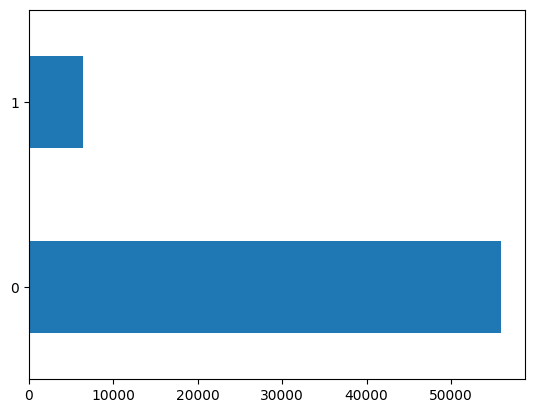

In [37]:
#Target 변수 조회
data = df_s_f
print(data['Outcome1'].value_counts())
print(data['Outcome1'].value_counts(normalize = True))

data['Outcome1'].value_counts().plot(kind = 'barh')
plt.show()

In [38]:
data_12=data.query('Date_recieved.str.contains("2012")').drop(labels='Date_event', axis=1).reset_index(drop=True)
data_22=data.query('Date_recieved.str.contains("2022")').drop(labels='Date_event', axis=1).reset_index(drop=True)
print(data_12.shape)
print(data_22.shape)

(3818, 7)
(3450, 7)


##2022년도 보고된 adverse report 분석

###데이터 준비


In [39]:
#x, y로 나누기
target = 'Outcome1'
x = data_22.drop(target, axis = 1)
y = data_22.loc[:,target]

In [40]:
data_22.head()

,Date_recieved,AE_type,PD,Sex,Age_in_years,MedDra_PT1,Outcome1
0,9/30/2022,CONCOMITANT,Mag,Female,40.0,fatigue,0
1,9/30/2022,CONCOMITANT,vitamin c &d,Female,40.0,fatigue,0
2,9/30/2022,CONCOMITANT,zinc,Female,40.0,fatigue,0
3,9/30/2022,CONCOMITANT,DAILY MULTIVITAMIN,Male,23.7,abdominal pain upper,0
4,9/30/2022,SUSPECT,RITUAL SYNBIOTIC,Female,35.0,hypersensitivity,0


In [41]:
#명목형 범주 가변수화
#dummy_vars = ['Date_recieved', 'AE_type', 'PD', 'MedDra_PT1']
#x = pd.get_dummies(x, columns = dummy_vars)
#x.head()

In [42]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 42, stratify=y)

In [43]:
#스케일링
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_train_s = scaler.fit_transform(x_train_o)
#x_val_s = scaler.transform(x_val_o)
#x_test_s = scaler.transform(x_test_o)

In [80]:
!pip install category_encoders
!pip install pdpbox
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=6d5f061fb8313b6bfd9d4fa2ae6f6947d4bca5f874b148e46ef2269f4dd35088
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060203 sha256=1bcf4fbe9492764bf818ce3a8da8f12bec8b6640b5b19f44613e89e3f7e0066a
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f

In [45]:
'''
#Logistic 회귀용 onhotencoding
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
x_train_h = hot.fit_transform(x_train)
x_val_h = hot.transform(x_val)
x_test_h = hot.transform(x_test)
'''
#Logistic 회귀용
dummy_vars = ['Sex','Date_recieved', 'AE_type', 'PD', 'MedDra_PT1']
x_l = pd.get_dummies(x, columns = dummy_vars)
x_l.head()

,Age_in_years,Sex_Female,Sex_Male,Sex_Unknown,Date_recieved_1/10/2022,Date_recieved_1/11/2022,Date_recieved_1/12/2022,Date_recieved_1/13/2022,Date_recieved_1/16/2022,Date_recieved_1/17/2022,...,MedDra_PT1_urinary retention,MedDra_PT1_urinary tract infection,MedDra_PT1_urticaria,MedDra_PT1_ventricular tachycardia,MedDra_PT1_viith nerve paralysis,MedDra_PT1_visual impairment,MedDra_PT1_vitamin b6 increased,MedDra_PT1_vitamin d increased,MedDra_PT1_vomiting,MedDra_PT1_withdrawal syndrome
0,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x_train_l, x_val_l, y_train_l, y_val_l = train_test_split(x_l, y, test_size = .3, random_state = 42, stratify=y)

In [47]:
#명목형 범주 encoding
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder()
x_train_o = encoder.fit_transform(x_train)
x_val_o = encoder.transform(x_val)
x_test_o = encoder.transform(x_test)

### 모델 생성

In [48]:
#라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder,OrdinalEncoder

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

기준모델 : 로지스틱 회귀모델

In [49]:
#기준모델 생성(로지스틱)
base_model = LogisticRegression()
base_model.fit(x_train_l, y_train_l)

# 성능 예측
base_pred = base_model.predict(x_val_l)
print(confusion_matrix(y_val_l, base_pred))
print(classification_report(y_val_l, base_pred))

[[921   2]
 [ 85  27]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       923
           1       0.93      0.24      0.38       112

    accuracy                           0.92      1035
   macro avg       0.92      0.62      0.67      1035
weighted avg       0.92      0.92      0.89      1035



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


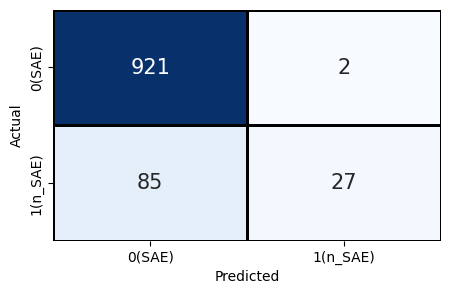

In [50]:
import seaborn as sns
base_pred = base_model.predict(x_val_l)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val_l, base_pred),
            cmap='Blues',
            cbar=False,
            annot=True,
            annot_kws={'size':15}, 
            fmt='.0f',
            xticklabels=['0(SAE)','1(n_SAE)'],
            yticklabels=['0(SAE)','1(n_SAE)'],
            linecolor='k',
            linewidths=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

모델 1 : Rf 모델

In [51]:
#Rf 모델 생성
model1 = RandomForestClassifier()
model1.fit(x_train_o, y_train)
#Rf 모델 검증
pred1 = model1.predict(x_val_o)
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[922   1]
 [ 73  39]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       923
           1       0.97      0.35      0.51       112

    accuracy                           0.93      1035
   macro avg       0.95      0.67      0.74      1035
weighted avg       0.93      0.93      0.91      1035



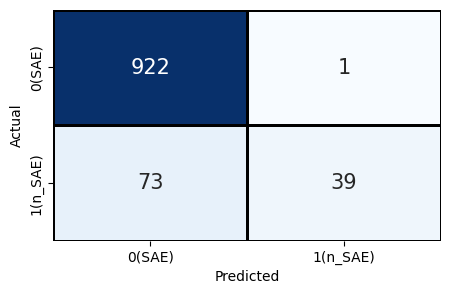

In [52]:
pred1 = model1.predict(x_val_o)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, pred1),
            cmap='Blues',
            cbar=False,
            annot=True,
            annot_kws={'size':15}, 
            fmt='.0f',
            xticklabels=['0(SAE)','1(n_SAE)'],
            yticklabels=['0(SAE)','1(n_SAE)'],
            linecolor='k',
            linewidths=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

모델 2 : XGBoost 모델

In [53]:
#XGBoost 모델 생성
model2 = XGBClassifier()
model2.fit(x_train_o, y_train)
#XGBoost 모델 검증증
pred2 = model2.predict(x_val_o)
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[921   2]
 [ 57  55]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       923
           1       0.96      0.49      0.65       112

    accuracy                           0.94      1035
   macro avg       0.95      0.74      0.81      1035
weighted avg       0.94      0.94      0.93      1035



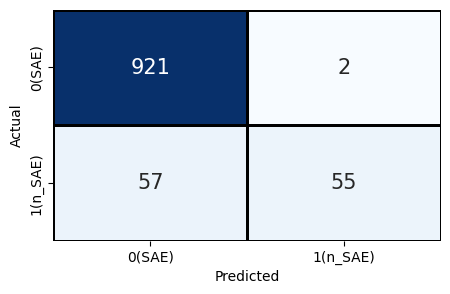

In [54]:
pred1 = model2.predict(x_val_o)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, pred1),
            cmap='Blues',
            cbar=False,
            annot=True,
            annot_kws={'size':15}, 
            fmt='.0f',
            xticklabels=['0(SAE)','1(n_SAE)'],
            yticklabels=['0(SAE)','1(n_SAE)'],
            linecolor='k',
            linewidths=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Resampling 모델링

In [55]:
from imblearn.under_sampling import RandomUnderSampler # down
from imblearn.over_sampling import RandomOverSampler, SMOTE  # up, smote

In [56]:
# 다운샘플링
rus = RandomUnderSampler(random_state = 42)
x_train_d, y_train_d = rus.fit_resample(x_train_o, y_train)

# 업샘플링
ros = RandomOverSampler(random_state = 42)
x_train_u, y_train_u = ros.fit_resample(x_train_o, y_train)

# SMOTE
smote = SMOTE(random_state = 42)
x_train_sm, y_train_sm = smote.fit_resample(x_train_o, y_train)

다운샘플링 모델링링

In [57]:
model1_d = XGBClassifier()
model1_d.fit(x_train_d, y_train_d)
pred1_d = model1_d.predict(x_val_o)
print(confusion_matrix(y_val, pred1_d))
print(classification_report(y_val, pred1_d))

[[696 227]
 [ 34  78]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       923
           1       0.26      0.70      0.37       112

    accuracy                           0.75      1035
   macro avg       0.60      0.73      0.61      1035
weighted avg       0.88      0.75      0.79      1035



업샘플링 모델링링

In [58]:
model1_u = XGBClassifier()
model1_u.fit(x_train_u, y_train_u)
pred1_u = model1_u.predict(x_val_o)
print(confusion_matrix(y_val, pred1_u))
print(classification_report(y_val, pred1_u))

[[915   8]
 [ 47  65]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       923
           1       0.89      0.58      0.70       112

    accuracy                           0.95      1035
   macro avg       0.92      0.79      0.84      1035
weighted avg       0.94      0.95      0.94      1035



SMOTE

In [59]:
model1_sm = XGBClassifier()
model1_sm.fit(x_train_sm, y_train_sm)
pred1_sm = model1_sm.predict(x_val_o)
print(confusion_matrix(y_val, pred1_sm))
print(classification_report(y_val, pred1_sm))

[[892  31]
 [ 70  42]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       923
           1       0.58      0.38      0.45       112

    accuracy                           0.90      1035
   macro avg       0.75      0.67      0.70      1035
weighted avg       0.89      0.90      0.89      1035



class weight 조절

In [60]:
# 모델링 및 평가
model_wb = XGBClassifier(class_weight='balanced')
model_wb.fit(x_train_o, y_train)
pred_wb = model_wb.predict(x_val_o)

print(confusion_matrix(y_val, pred_wb))
print(classification_report(y_val, pred_wb))

[05:25:12] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[[921   2]
 [ 57  55]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       923
           1       0.96      0.49      0.65       112

    accuracy                           0.94      1035
   macro avg       0.95      0.74      0.81      1035
weighted avg       0.94      0.94      0.93      1035



###추가 확인

In [61]:
from sklearn.metrics import *

In [62]:
# XGB로 모델링 및 검증(f1 score)하는 함수 생성
def modeling(x_train_o, y_train, x_val_o, y_val, cw = None) :
    m = XGBClassifier(class_weight = cw)
    m.fit(x_train_o, y_train)
    pred = m.predict(x_val_o)
    return f1_score(y_val,pred, pos_label=0) # 0 : 심각한 부작용을 보고한 소비자

In [63]:
from tqdm import tqdm

In [64]:
x_o = encoder.transform(x)

In [65]:
# 결과를 담을 빈 리스트 선언
result_d, result_u, result_s, result_cw = [], [], [], []

# 리샘플러들 선언
down_sampler = RandomUnderSampler()
up_sampler = RandomOverSampler()
smote = SMOTE()

# 100번 반복하며...
for i in tqdm(range(100)):

    # 데이터분할 & 리샘플링(랜덤하게!!!!)
    x_train_o, x_val_o, y_train, y_val = train_test_split(x_o, y, test_size = .3)
    d_x_train, d_y_train = down_sampler.fit_resample(x_train_o, y_train)
    u_x_train, u_y_train = up_sampler.fit_resample(x_train_o, y_train)
    s_x_train, s_y_train = smote.fit_resample(x_train_o, y_train)

    # 모델링 및 검증성능(f1) 저장하기
    result_d.append(modeling(d_x_train, d_y_train, x_val_o, y_val))
    result_u.append(modeling(u_x_train, u_y_train, x_val_o, y_val))
    result_s.append(modeling(s_x_train, s_y_train, x_val_o, y_val))
    result_cw.append(modeling(x_train_o, y_train, x_val_o, y_val, 'balanced'))

  1%|          | 1/100 [00:01<01:50,  1.12s/it]

[05:25:13] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  2%|▏         | 2/100 [00:01<01:32,  1.06it/s]

[05:25:14] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  3%|▎         | 3/100 [00:04<02:35,  1.60s/it]

[05:25:16] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  4%|▍         | 4/100 [00:05<02:03,  1.29s/it]

[05:25:17] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[05:25:20] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  5%|▌         | 5/100 [00:09<03:53,  2.45s/it]

[05:25:34] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  7%|▋         | 7/100 [00:28<08:39,  5.58s/it]

[05:25:40] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  8%|▊         | 8/100 [00:28<06:13,  4.06s/it]

[05:25:41] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



  9%|▉         | 9/100 [00:29<04:37,  3.05s/it]

[05:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 10%|█         | 10/100 [00:30<03:31,  2.35s/it]

[05:25:43] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 11%|█         | 11/100 [00:31<02:47,  1.88s/it]

[05:25:44] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 12%|█▏        | 12/100 [00:32<02:16,  1.55s/it]

[05:25:44] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 13%|█▎        | 13/100 [00:32<01:54,  1.32s/it]

[05:25:45] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 14%|█▍        | 14/100 [00:33<01:38,  1.15s/it]

[05:25:46] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 15%|█▌        | 15/100 [00:34<01:27,  1.03s/it]

[05:25:47] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 16%|█▌        | 16/100 [00:35<01:20,  1.05it/s]

[05:25:47] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 17%|█▋        | 17/100 [00:36<01:15,  1.10it/s]

[05:25:48] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 18%|█▊        | 18/100 [00:36<01:11,  1.14it/s]

[05:25:49] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[05:25:50] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 20%|██        | 20/100 [00:39<01:28,  1.11s/it]

[05:25:52] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 21%|██        | 21/100 [00:40<01:19,  1.01s/it]

[05:25:53] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 22%|██▏       | 22/100 [00:41<01:15,  1.04it/s]

[05:25:54] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 23%|██▎       | 23/100 [00:42<01:10,  1.09it/s]

[05:25:54] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 24%|██▍       | 24/100 [00:43<01:21,  1.07s/it]

[05:25:56] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 25%|██▌       | 25/100 [00:44<01:14,  1.01it/s]

[05:25:57] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 26%|██▌       | 26/100 [00:45<01:09,  1.06it/s]

[05:25:57] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 27%|██▋       | 27/100 [00:46<01:05,  1.11it/s]

[05:25:58] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 28%|██▊       | 28/100 [00:46<01:03,  1.13it/s]

[05:25:59] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 29%|██▉       | 29/100 [00:47<01:01,  1.16it/s]

[05:26:00] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 30%|███       | 30/100 [00:48<00:59,  1.18it/s]

[05:26:01] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[05:26:02] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 32%|███▏      | 32/100 [00:51<01:14,  1.09s/it]

[05:26:04] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 33%|███▎      | 33/100 [00:52<01:06,  1.00it/s]

[05:26:04] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 34%|███▍      | 34/100 [00:52<01:01,  1.07it/s]

[05:26:05] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 35%|███▌      | 35/100 [00:53<00:57,  1.12it/s]

[05:26:06] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 36%|███▌      | 36/100 [00:54<00:54,  1.16it/s]

[05:26:07] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 37%|███▋      | 37/100 [00:55<00:53,  1.19it/s]

[05:26:07] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 38%|███▊      | 38/100 [00:56<00:51,  1.20it/s]

[05:26:08] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 39%|███▉      | 39/100 [00:56<00:50,  1.22it/s]

[05:26:09] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 40%|████      | 40/100 [00:57<00:48,  1.23it/s]

[05:26:10] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 41%|████      | 41/100 [00:58<00:47,  1.24it/s]

[05:26:11] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 42%|████▏     | 42/100 [00:59<00:46,  1.25it/s]

[05:26:11] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 43%|████▎     | 43/100 [01:00<00:45,  1.25it/s]

[05:26:12] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 44%|████▍     | 44/100 [01:02<01:06,  1.19s/it]

[05:26:14] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 45%|████▌     | 45/100 [01:02<00:58,  1.07s/it]

[05:26:15] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 46%|████▌     | 46/100 [01:03<00:53,  1.01it/s]

[05:26:16] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 47%|████▋     | 47/100 [01:04<00:49,  1.08it/s]

[05:26:17] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 48%|████▊     | 48/100 [01:05<00:46,  1.13it/s]

[05:26:18] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 49%|████▉     | 49/100 [01:06<00:43,  1.17it/s]

[05:26:18] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 50%|█████     | 50/100 [01:06<00:41,  1.19it/s]

[05:26:19] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 51%|█████     | 51/100 [01:07<00:40,  1.21it/s]

[05:26:20] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 52%|█████▏    | 52/100 [01:08<00:39,  1.23it/s]

[05:26:21] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 53%|█████▎    | 53/100 [01:09<00:37,  1.25it/s]

[05:26:21] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 54%|█████▍    | 54/100 [01:10<00:36,  1.26it/s]

[05:26:22] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 55%|█████▌    | 55/100 [01:10<00:35,  1.26it/s]

[05:26:23] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 56%|█████▌    | 56/100 [01:11<00:34,  1.26it/s]

[05:26:24] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 57%|█████▋    | 57/100 [01:13<00:50,  1.18s/it]

[05:26:26] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 58%|█████▊    | 58/100 [01:14<00:44,  1.06s/it]

[05:26:27] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 59%|█████▉    | 59/100 [01:15<00:40,  1.02it/s]

[05:26:27] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 60%|██████    | 60/100 [01:16<00:36,  1.08it/s]

[05:26:28] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 61%|██████    | 61/100 [01:16<00:34,  1.12it/s]

[05:26:29] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 62%|██████▏   | 62/100 [01:17<00:32,  1.16it/s]

[05:26:30] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 63%|██████▎   | 63/100 [01:18<00:31,  1.19it/s]

[05:26:31] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 64%|██████▍   | 64/100 [01:19<00:29,  1.21it/s]

[05:26:31] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[05:26:38] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 66%|██████▌   | 66/100 [01:32<02:02,  3.61s/it]

[05:26:44] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 67%|██████▋   | 67/100 [01:33<01:31,  2.77s/it]

[05:26:45] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 68%|██████▊   | 68/100 [01:33<01:09,  2.17s/it]

[05:26:46] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 69%|██████▉   | 69/100 [01:34<00:54,  1.75s/it]

[05:26:47] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 70%|███████   | 70/100 [01:35<00:44,  1.47s/it]

[05:26:48] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 71%|███████   | 71/100 [01:37<00:48,  1.66s/it]

[05:26:50] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 72%|███████▏  | 72/100 [01:38<00:38,  1.39s/it]

[05:26:50] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 73%|███████▎  | 73/100 [01:39<00:32,  1.21s/it]

[05:26:51] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 74%|███████▍  | 74/100 [01:39<00:28,  1.09s/it]

[05:26:52] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 75%|███████▌  | 75/100 [01:40<00:24,  1.00it/s]

[05:26:53] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 76%|███████▌  | 76/100 [01:41<00:22,  1.07it/s]

[05:26:54] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 77%|███████▋  | 77/100 [01:42<00:20,  1.11it/s]

[05:26:54] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 78%|███████▊  | 78/100 [01:43<00:19,  1.15it/s]

[05:26:55] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 79%|███████▉  | 79/100 [01:43<00:17,  1.19it/s]

[05:26:56] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 80%|████████  | 80/100 [01:44<00:16,  1.20it/s]

[05:26:57] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 81%|████████  | 81/100 [01:45<00:15,  1.22it/s]

[05:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 82%|████████▏ | 82/100 [01:46<00:14,  1.23it/s]

[05:26:58] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[05:26:59] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 84%|████████▍ | 84/100 [01:49<00:18,  1.18s/it]

[05:27:01] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 85%|████████▌ | 85/100 [01:49<00:15,  1.06s/it]

[05:27:02] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 86%|████████▌ | 86/100 [01:50<00:13,  1.03it/s]

[05:27:03] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 87%|████████▋ | 87/100 [01:51<00:11,  1.09it/s]

[05:27:04] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 88%|████████▊ | 88/100 [01:52<00:10,  1.13it/s]

[05:27:04] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 89%|████████▉ | 89/100 [01:53<00:09,  1.16it/s]

[05:27:05] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 90%|█████████ | 90/100 [01:53<00:08,  1.19it/s]

[05:27:06] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 91%|█████████ | 91/100 [01:54<00:07,  1.20it/s]

[05:27:07] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 92%|█████████▏| 92/100 [01:55<00:06,  1.22it/s]

[05:27:08] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 93%|█████████▎| 93/100 [01:56<00:05,  1.23it/s]

[05:27:08] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 94%|█████████▍| 94/100 [01:57<00:04,  1.24it/s]

[05:27:09] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 95%|█████████▌| 95/100 [01:57<00:04,  1.25it/s]

[05:27:10] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[05:27:11] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 97%|█████████▋| 97/100 [02:00<00:03,  1.06s/it]

[05:27:13] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 98%|█████████▊| 98/100 [02:01<00:01,  1.02it/s]

[05:27:14] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



 99%|█████████▉| 99/100 [02:02<00:00,  1.08it/s]

[05:27:14] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



100%|██████████| 100/100 [02:03<00:00,  1.23s/it]

[05:27:15] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



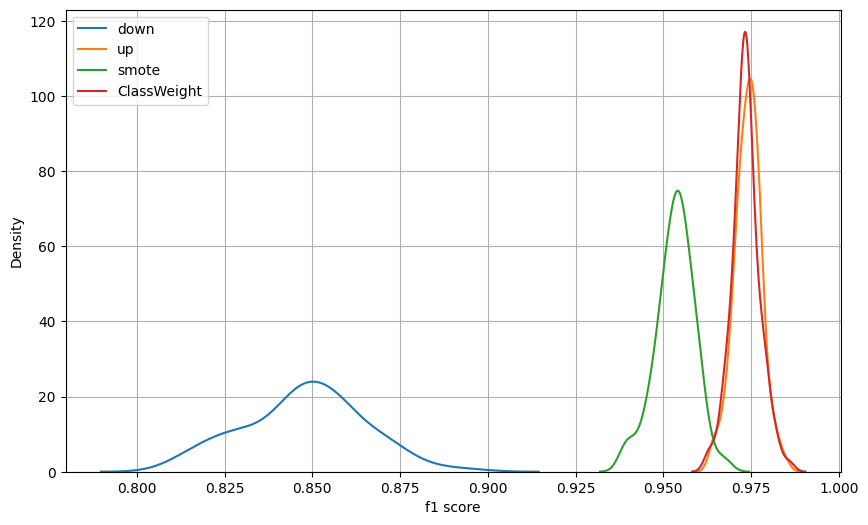

In [66]:
plt.figure(figsize=(10, 6))
sns.kdeplot(result_d, label= 'down')
sns.kdeplot(result_u, label = 'up')
sns.kdeplot(result_s, label = 'smote' )
sns.kdeplot(result_cw, label = 'ClassWeight' )

plt.xlabel('f1 score')
plt.legend()
plt.grid()
plt.show()

###하이퍼파라미터 튜닝

0    3078
1     372
Name: Outcome1, dtype: int64
0    0.892174
1    0.107826
Name: Outcome1, dtype: float64


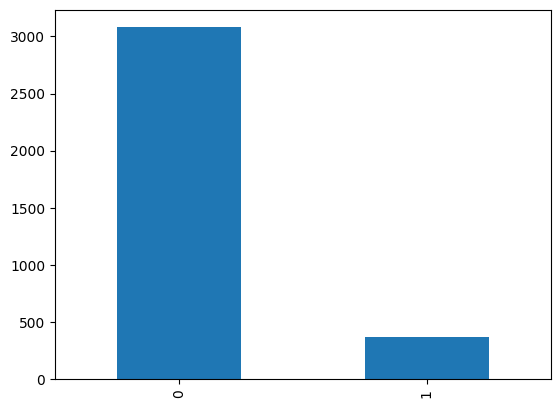

In [67]:
#Target 변수 조회
print(data_22['Outcome1'].value_counts())
print(data_22['Outcome1'].value_counts(normalize = True))

data_22['Outcome1'].value_counts().plot(kind = 'bar')
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [69]:
# 업샘플링
ros = RandomOverSampler(random_state = 42)
x_train_u, y_train_u = ros.fit_resample(x_train_o, y_train)
#up_sampling 모델
model2_u = XGBClassifier()
model2_u.fit(x_train_u, y_train_u)
pred1_u = model2_u.predict(x_val_o)
print(confusion_matrix(y_val, pred1_u))
print(classification_report(y_val, pred1_u))

[[909  20]
 [ 31  75]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       929
           1       0.79      0.71      0.75       106

    accuracy                           0.95      1035
   macro avg       0.88      0.84      0.86      1035
weighted avg       0.95      0.95      0.95      1035



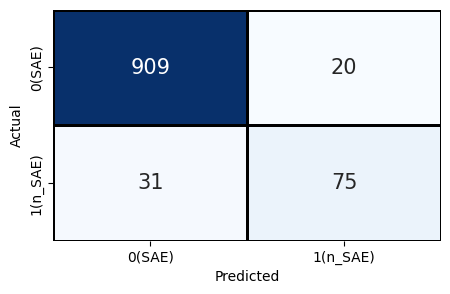

In [70]:
pred1 = model2_u.predict(x_val_o)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, pred1),
            cmap='Blues',
            cbar=False,
            annot=True,
            annot_kws={'size':15}, 
            fmt='.0f',
            xticklabels=['0(SAE)','1(n_SAE)'],
            yticklabels=['0(SAE)','1(n_SAE)'],
            linecolor='k',
            linewidths=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
# 함수 불러오기
from sklearn.model_selection import GridSearchCV

# 매개변수 선언
params = {
    "xgbclassifier__max_depth": [7, 10, 13, 20],
    "xgbclassifier__min_child_weight": [1, 2, 3],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.3],
    "xgbclassifier__scale_pos_weight": [1, 2, 3, 4]  
    }

# GridSearchCV 모델

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(model2_u, 
                           param_grid=params, 
                           scoring="f1", 
                           cv=3,
)

# 학습하기
grid_search.fit(x_train_u, y_train_u)

[05:27:16] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__scale_pos_weight" } are not used.

[05:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__scale_pos_weight" } are not used.

[05:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__scale_pos_weight" } are not used.

[05:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__scale_pos_weight" } are not used.

[05:27:18] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__scale_pos_weigh

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'xgbclassifier__learning_rate': [0.01, 0.1, 0.3],
                         'xgbclassifier__max_depth': [7, 10, 13, 20],
                         'xgbclassifier__min_child_weight': [1, 2, 3],
                         'xgbclassifier__scale_pos_weight': [1, 2, 3, 4]},
             scoring='f1')

In [72]:
# 확인
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 F1: ", grid_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__scale_pos_weight': 1}
최적 F1:  0.9846568091936708


### 최적의 파라미터 모델

In [73]:
#최적 모델
best_search = XGBClassifier(random_state=42,
                                          max_depth=7, 
                                         min_child_weight=1,
                                         learning_rate=0.01,
                                         scale_pos_weight=1
                                        )
#학습하기
best_search.fit(x_train_u, y_train_u)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [74]:
#성능 검증
y_pred_tr = best_search.predict(x_train_u)
print("훈련 정확도: ", best_search.score(x_train_u, y_train_u))
print("검증 정확도: ", best_search.score(x_val_o, y_val))
y_pred = best_search.predict(x_val_o)
print(classification_report(y_val, y_pred))

훈련 정확도:  0.9001861330851559
검증 정확도:  0.8376811594202899
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       929
           1       0.35      0.71      0.47       106

    accuracy                           0.84      1035
   macro avg       0.66      0.78      0.69      1035
weighted avg       0.90      0.84      0.86      1035



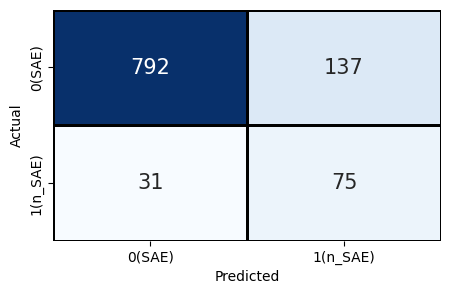

In [75]:
pred1 = best_search.predict(x_val_o)
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, pred1),
            cmap='Blues',
            cbar=False,
            annot=True,
            annot_kws={'size':15}, 
            fmt='.0f',
            xticklabels=['0(SAE)','1(n_SAE)'],
            yticklabels=['0(SAE)','1(n_SAE)'],
            linecolor='k',
            linewidths=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 최종 모델 test set로 평가

In [125]:
#성능 검증
y_pred_tr = best_search.predict(x_train_u)
print("훈련 정확도: ", best_search.score(x_train_u, y_train_u))
print("평가 정확도: ", best_search.score(x_test_o, y_test))
y_pred = best_search.predict(x_test_o)
print(classification_report(y_test, y_pred))

훈련 정확도:  0.9001861330851559
평가 정확도:  0.885024154589372
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       923
           1       0.48      0.86      0.62       112

    accuracy                           0.89      1035
   macro avg       0.73      0.87      0.77      1035
weighted avg       0.93      0.89      0.90      1035



### 변수 중요도 비교

In [76]:
from sklearn.inspection import permutation_importance

In [91]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.set_context("poster")
    sns.set_palette('Set3', 6)
    sns.set_style('white')
    sns.despine()
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.title('Feature Importance')
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

Feature importance

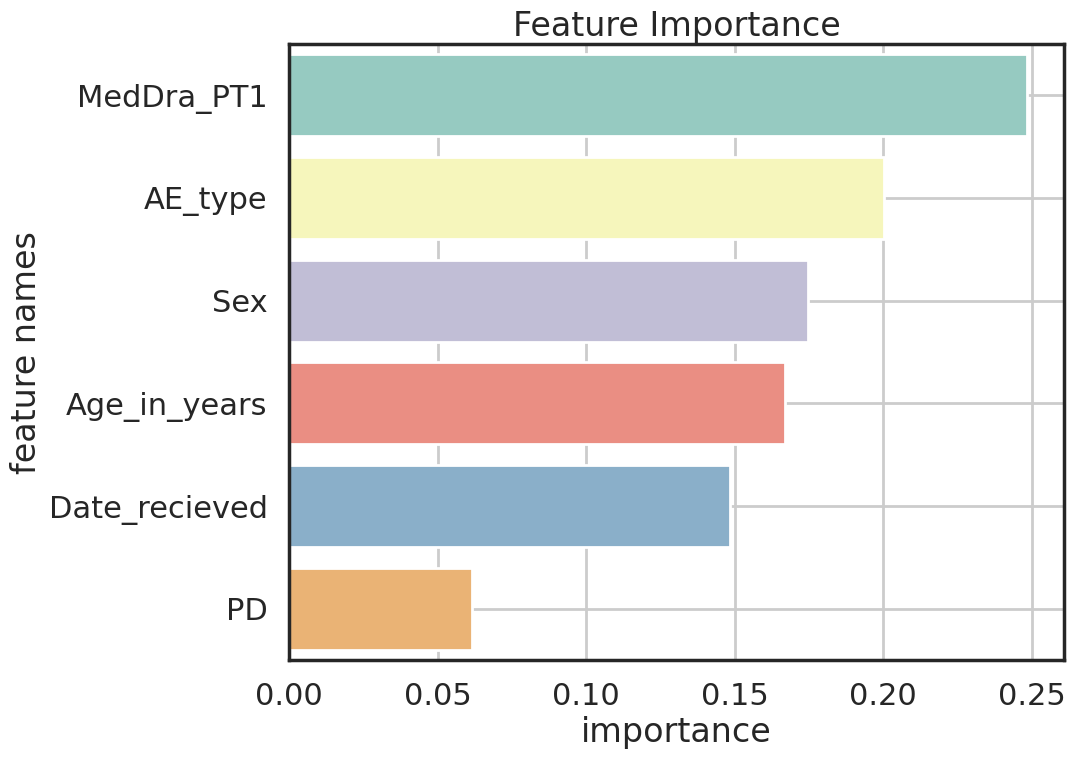

In [92]:
result2 = plot_feature_importance(best_search.feature_importances_, list(x))

###permutation importance

In [85]:
from sklearn.inspection import permutation_importance

In [87]:
pfi1 = permutation_importance(best_search, x_val_o, y_val, n_repeats=10, 
                              scoring = 'accuracy', random_state=20)

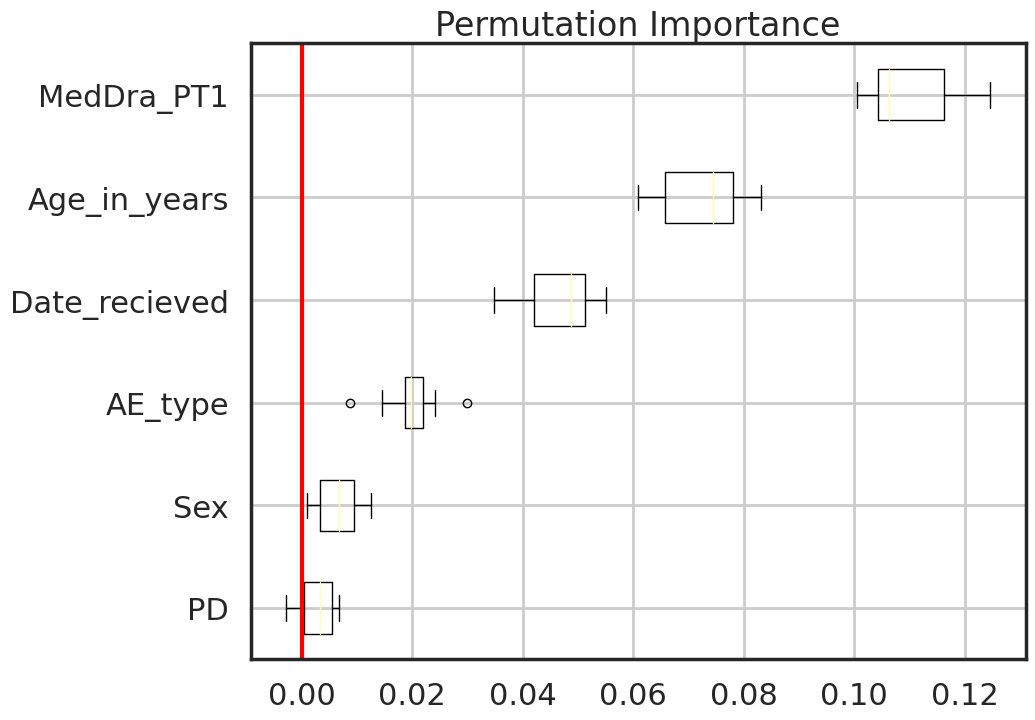

In [89]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.title("Permutation Importance")
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

In [93]:
x_train_u.nunique()

Date_recieved     206
AE_type             2
PD               1123
Sex                 3
Age_in_years      272
MedDra_PT1        274
dtype: int64

###eli5

In [126]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=19731691ea17ad8924ee99626f21261ad2d8fc5ba9066e0c6e9bd21d24d424fa
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [128]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

perm = PermutationImportance(best_search, scoring = "accuracy", random_state = 42).fit(x_test_o, y_test) 
eli5.show_weights(perm, top = 6, feature_names = x_test_o.columns.tolist())

Weight,Feature
0.1345 ± 0.0159,MedDra_PT1
0.0812 ± 0.0110,Age_in_years
0.0719 ± 0.0187,Date_recieved
0.0213 ± 0.0091,AE_type
0.0122 ± 0.0040,PD
0.0064 ± 0.0055,Sex


###PDP

In [81]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from pdpbox.pdp import pdp_isolate, pdp_plot
import warnings
warnings.simplefilter(action='ignore')

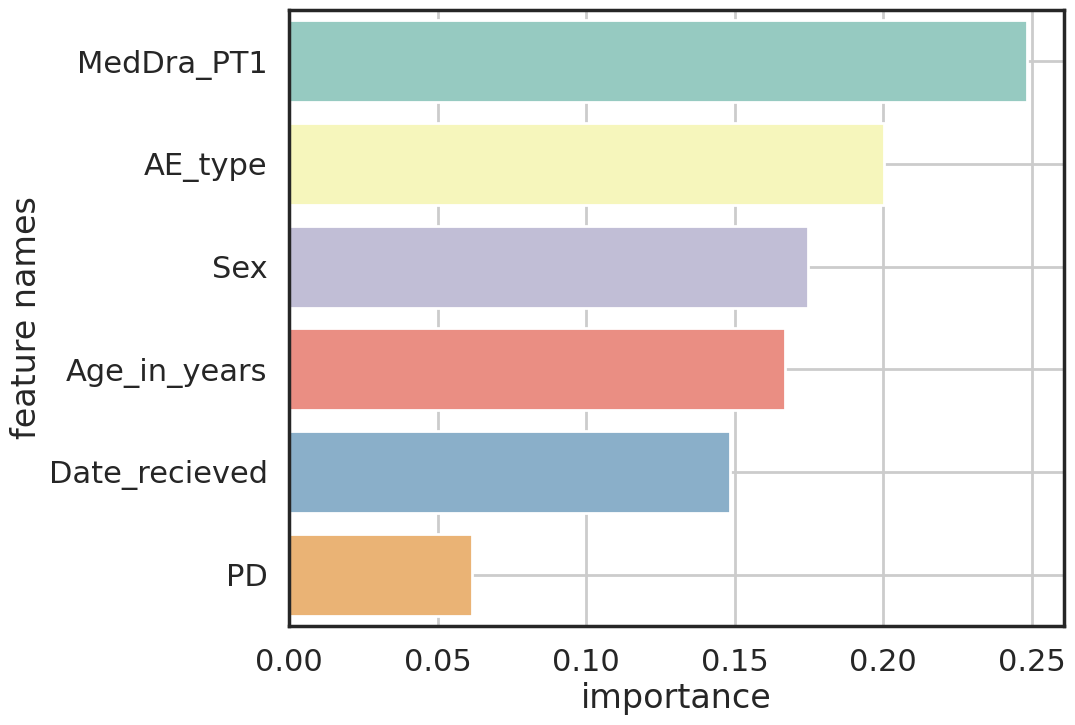

In [82]:
r2 = plot_feature_importance(best_search.feature_importances_, list(x))

In [83]:
plt.rcParams['figure.figsize'] = 10, 6

#### Age

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='Age_in_years'>})

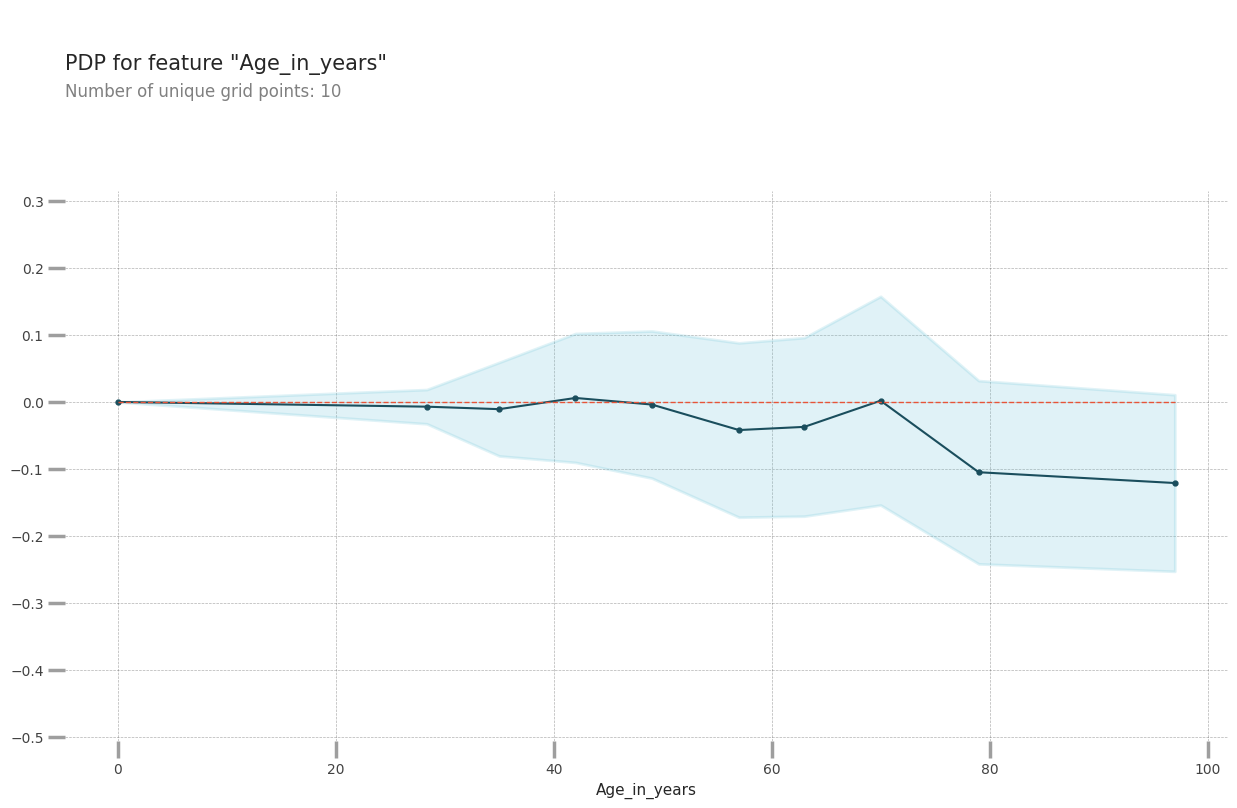

In [129]:
var = "Age_in_years"

isolated = pdp_isolate(best_search, dataset=x_test_o, model_features= list(x_test_o),
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

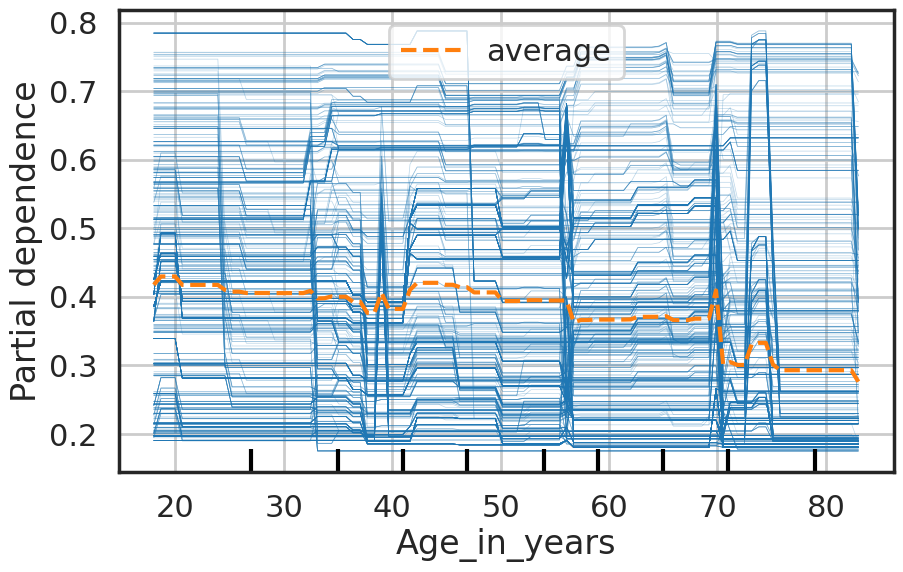

In [132]:
var = 'Age_in_years'

PartialDependenceDisplay.from_estimator(best_search, features = [var], X = x_val_o, kind = 'both')
plt.grid()
plt.show()

MedDra_PT

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='MedDra_PT1'>})

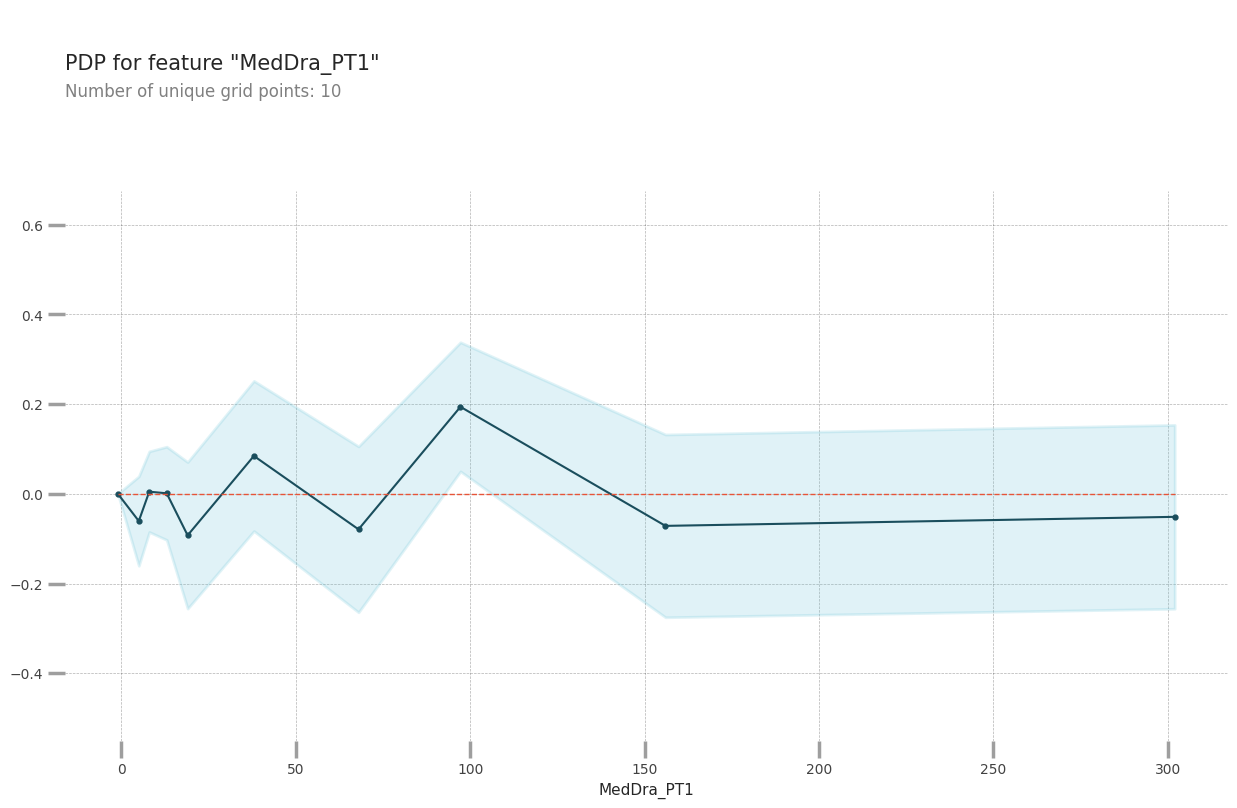

In [134]:
var = "MedDra_PT1"

isolated = pdp_isolate( best_search, dataset=x_test_o, model_features= list(x_test_o),
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

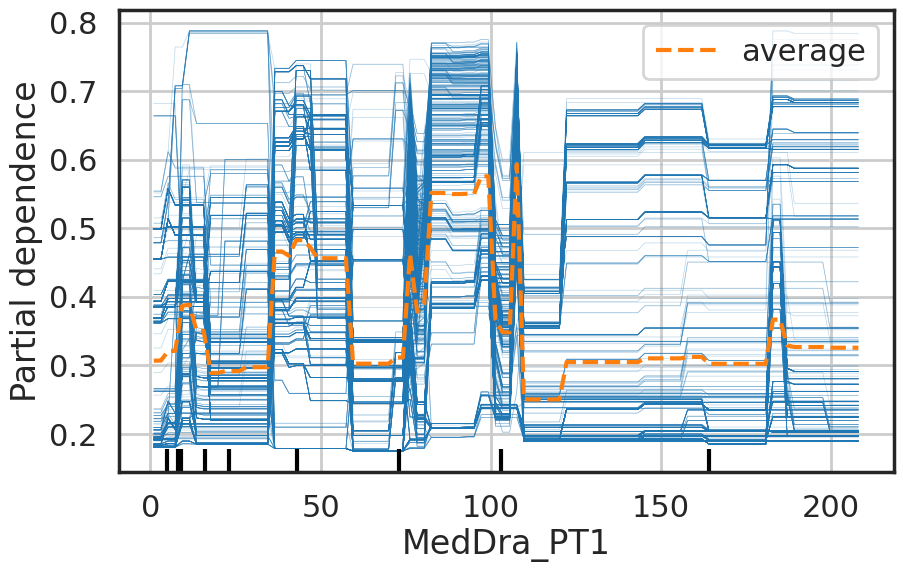

In [135]:
var = 'MedDra_PT1'

PartialDependenceDisplay.from_estimator(best_search, features = [var], X = x_test_o, kind = 'both')
plt.grid()
plt.show()

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='Date_recieved'>})

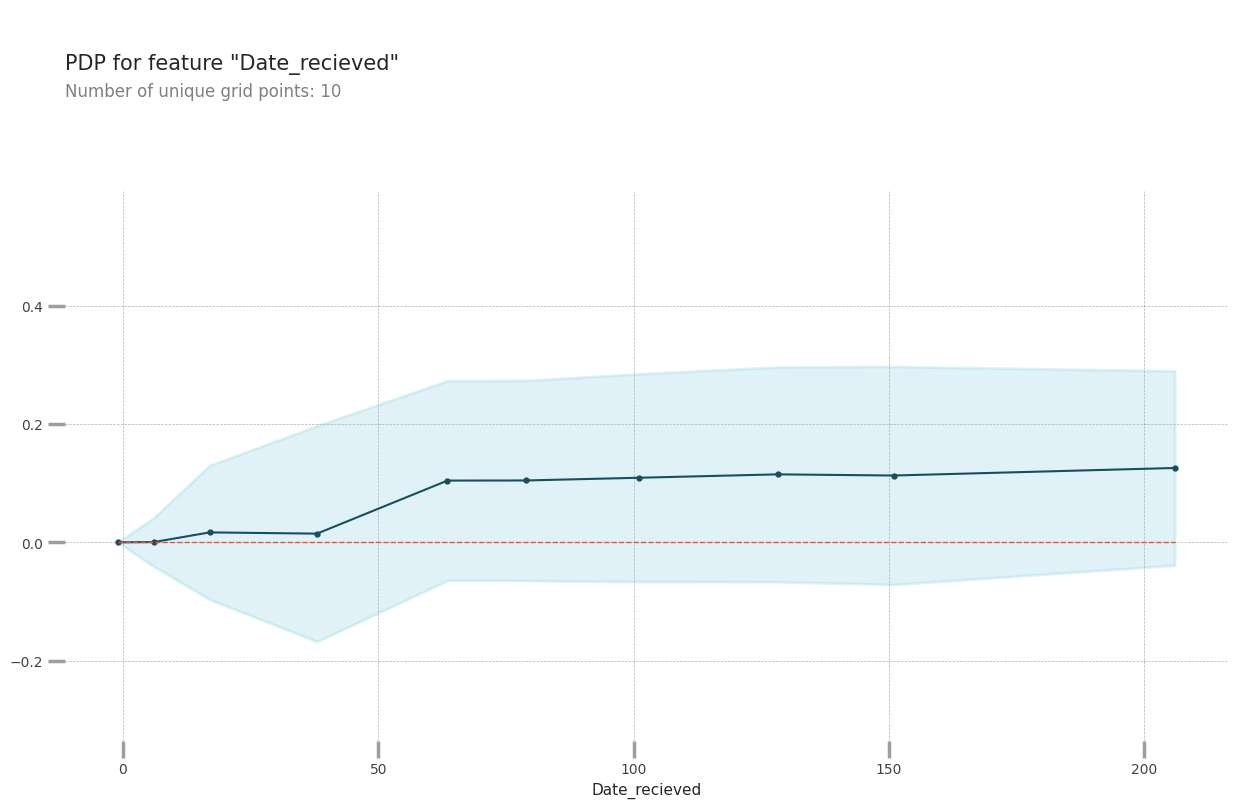

In [136]:
var = "Date_recieved"

isolated = pdp_isolate( best_search, dataset=x_test_o, model_features= list(x_test_o),
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

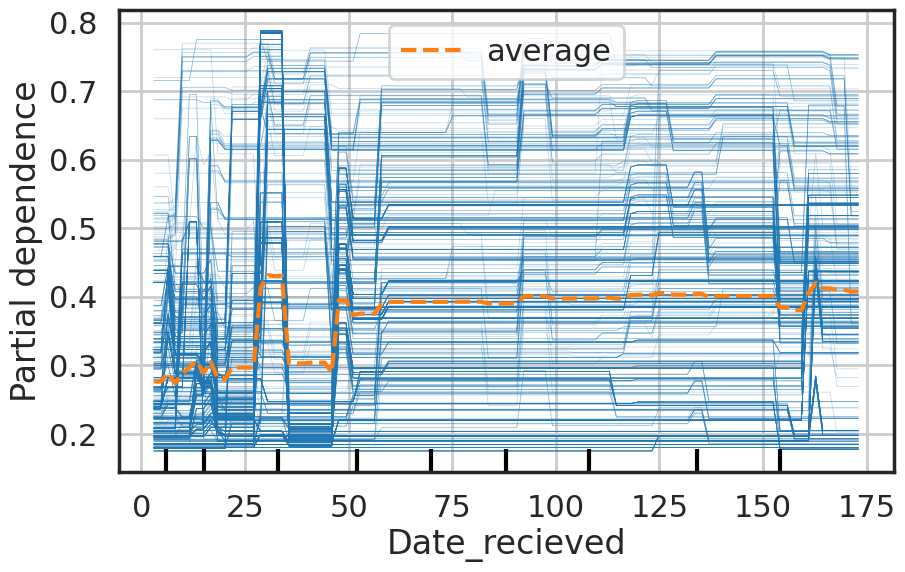

In [137]:
var = 'Date_recieved'

PartialDependenceDisplay.from_estimator(best_search, features = [var], X = x_test_o, kind = 'both')
plt.grid()
plt.show()

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='AE_type'>})

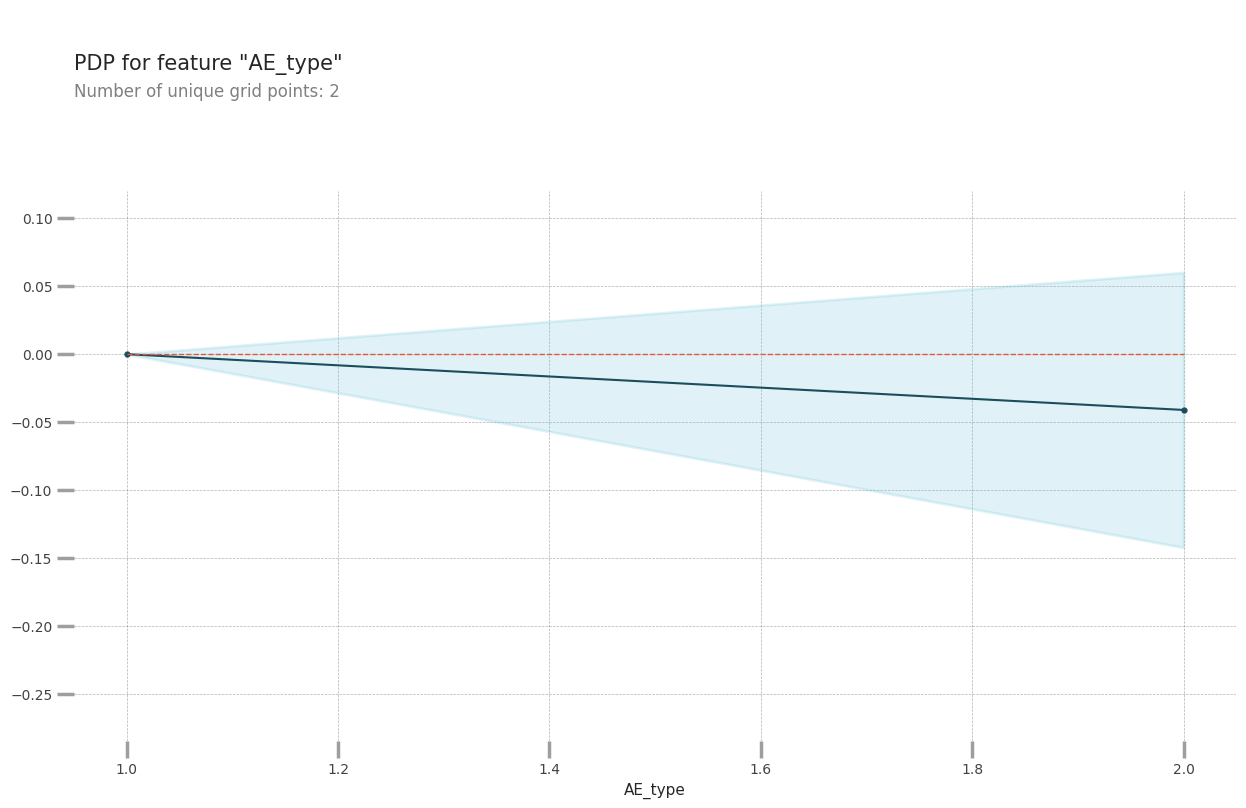

In [138]:
var = "AE_type"

isolated = pdp_isolate( best_search, dataset=x_test_o, model_features= list(x_test_o),
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

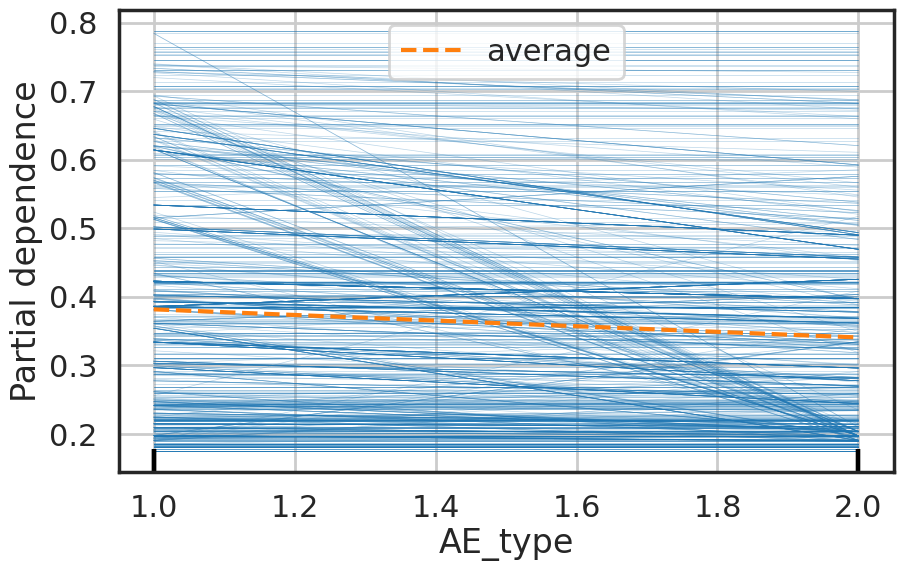

In [139]:
var = 'AE_type'

PartialDependenceDisplay.from_estimator(best_search, features = [var], X = x_test_o, kind = 'both')
plt.grid()
plt.show()

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='Sex'>})

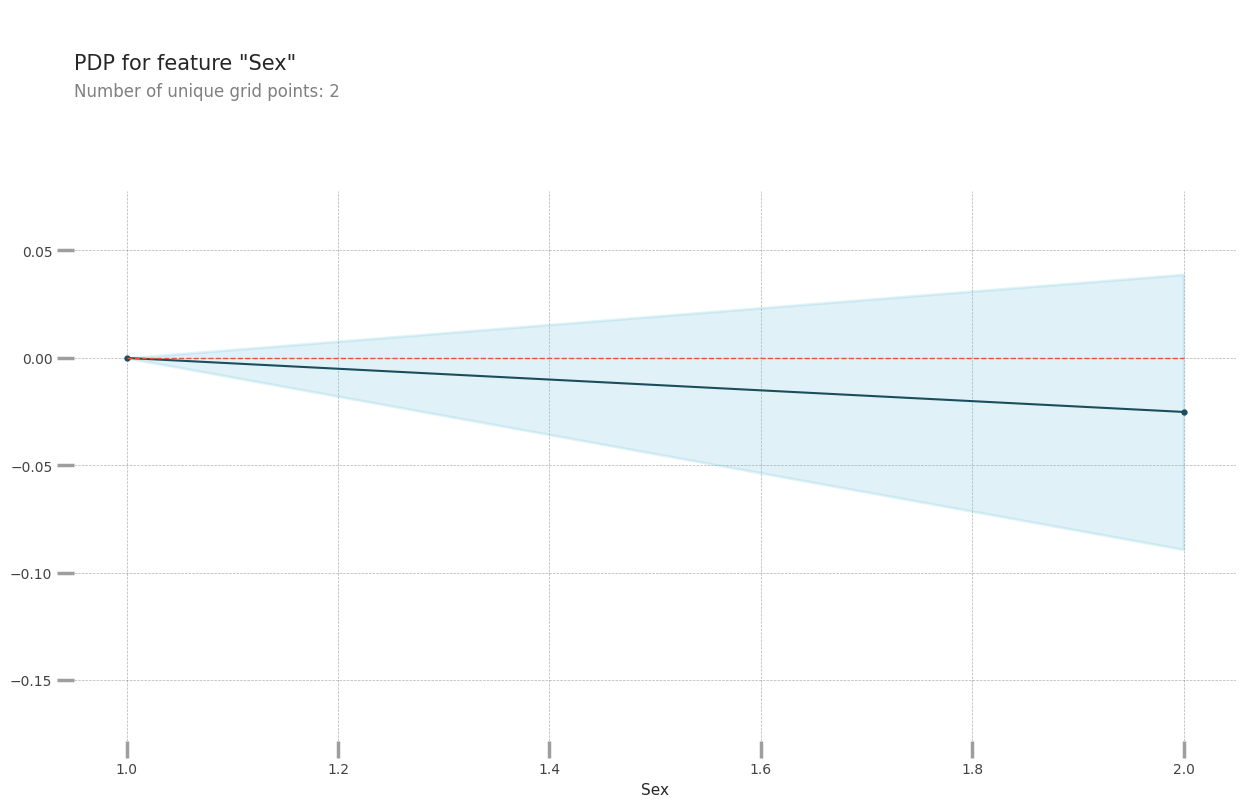

In [142]:
var = "Sex"

isolated = pdp_isolate( best_search, dataset=x_test_o, model_features= list(x_test_o),
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

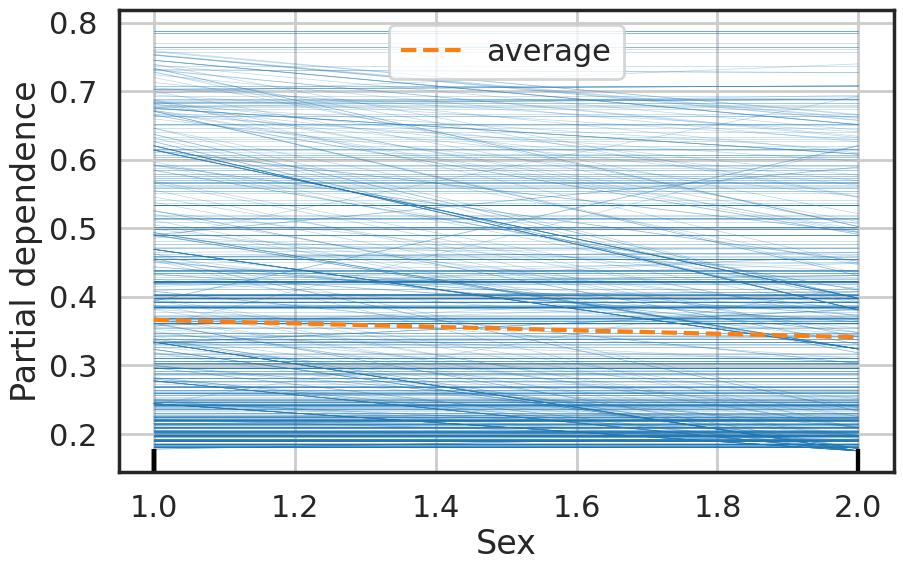

In [141]:
var = 'Sex'

PartialDependenceDisplay.from_estimator(best_search, features = [var], X = x_test_o, kind = 'both')
plt.grid()
plt.show()

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='PD'>})

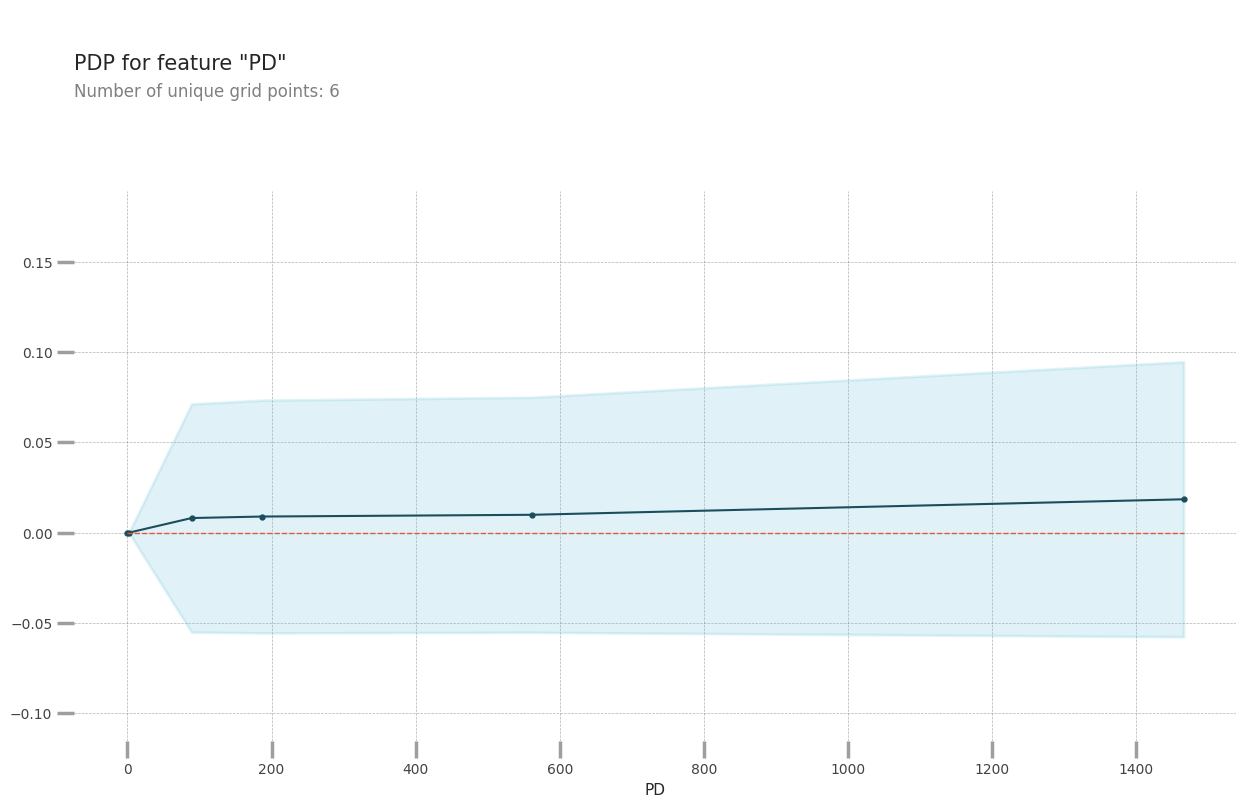

In [143]:
var = "PD"

isolated = pdp_isolate( best_search, dataset=x_test_o, model_features= list(x_test_o),
                        feature=var, grid_type="percentile")
pdp_plot(isolated, feature_name=var)

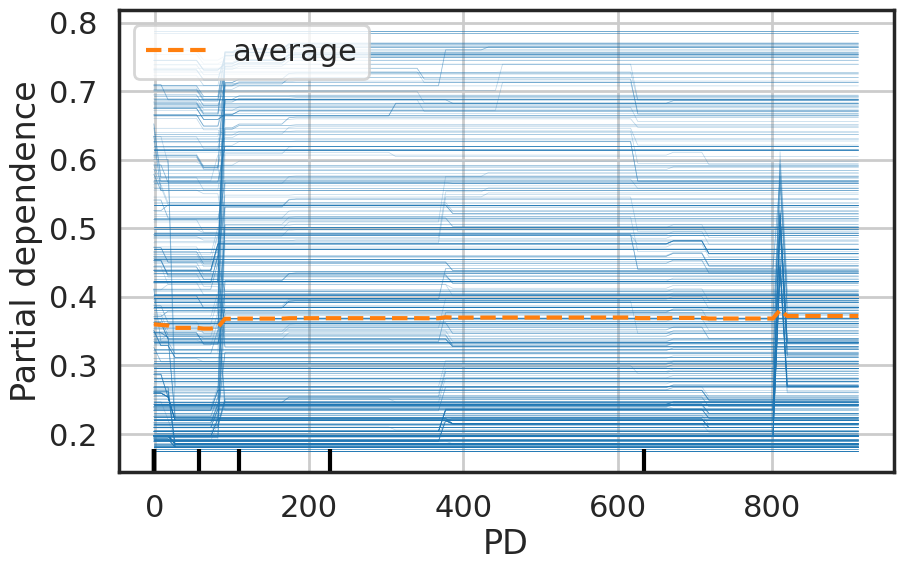

In [144]:
var = 'PD'

PartialDependenceDisplay.from_estimator(best_search, features = [var], X = x_test_o, kind = 'both')
plt.grid()
plt.show()

In [99]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_inter_ax': <Axes: xlabel='MedDra_PT1', ylabel='Age_in_years'>})

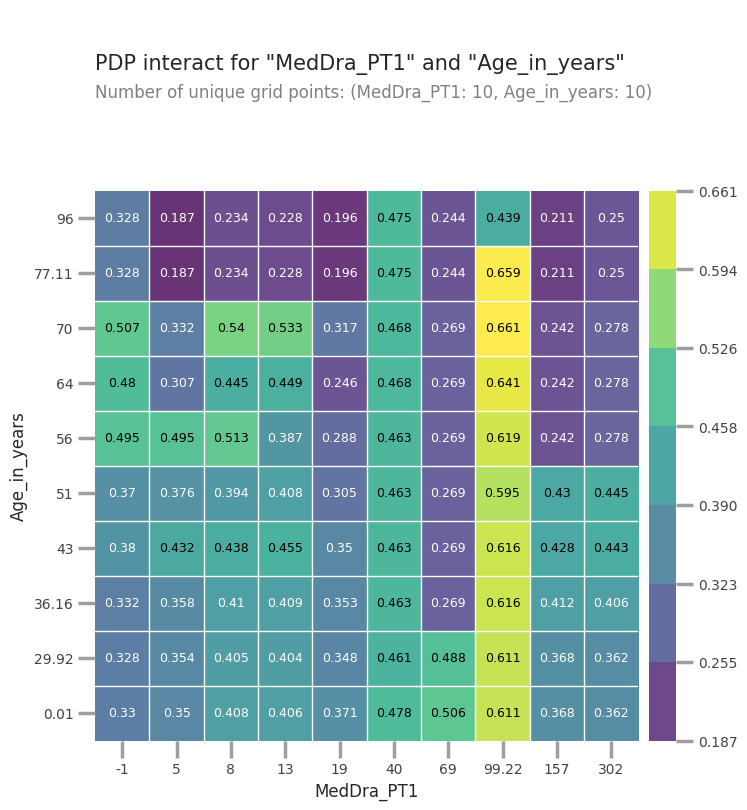

In [102]:
vars = ['MedDra_PT1','Age_in_years']

interaction = pdp_interact(best_search, dataset= x_val_o, model_features= list(x_val_o),
                            features=vars,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=vars)

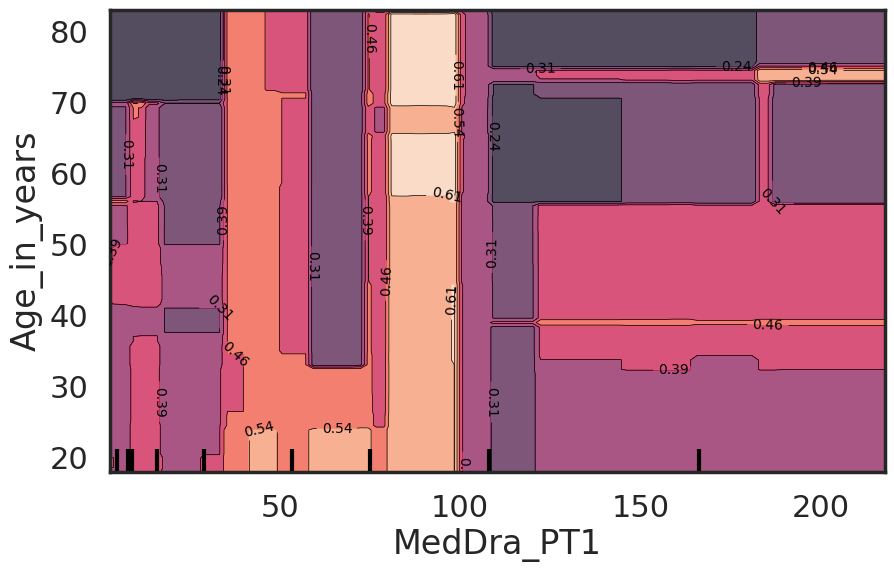

In [103]:
PartialDependenceDisplay.from_estimator(best_search, features = [('MedDra_PT1','Age_in_years')], X = x_val_o)
plt.show()

###ICE plot

In [104]:
print(encoder.categories_)

AttributeError: ignored

In [112]:
temp = x_val_o.copy()
temp.reset_index(drop = True, inplace = True)

#  200번 환자
temp.loc[[200]]

,Date_recieved,AE_type,PD,Sex,Age_in_years,MedDra_PT1
200,107.0,1,679.0,2,84.0,116.0


In [113]:
# ICE plot 함수 생성
def ice_plot(data, var, id, model) :
    '''
    input 설명
        * data : 데이터셋
        * var : 특정 feature
        * id : 특정 인스턴스, 분석단위...
        * 설명할 모델
    '''

    temp = data.loc[[id]]
    var_values = data[var].sort_values().tolist()
    pred = []
    for v in var_values :
        temp[var] = v
        pred.append(model.predict_proba(temp)[0,1])

    plt.plot(var_values, pred, marker = '.')
    plt.grid()
    plt.show()

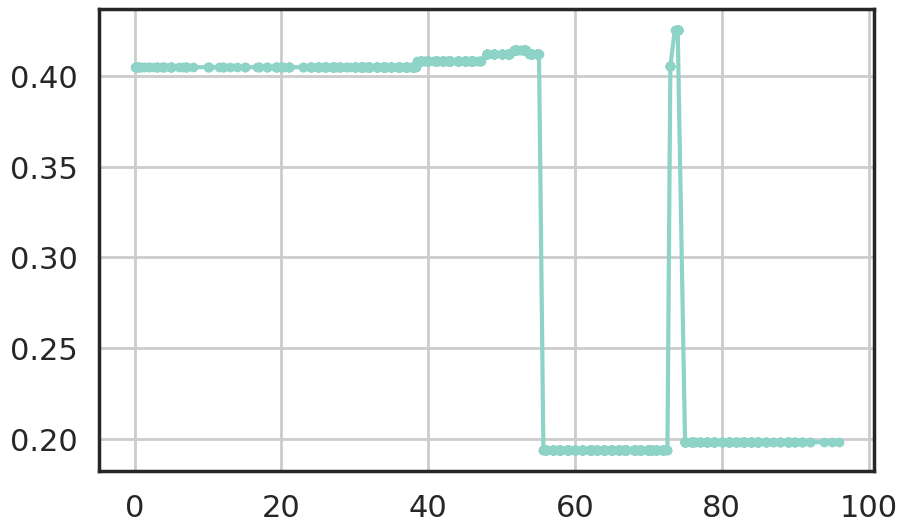

In [114]:
ice_plot(temp, 'Age_in_years', 200, best_search)

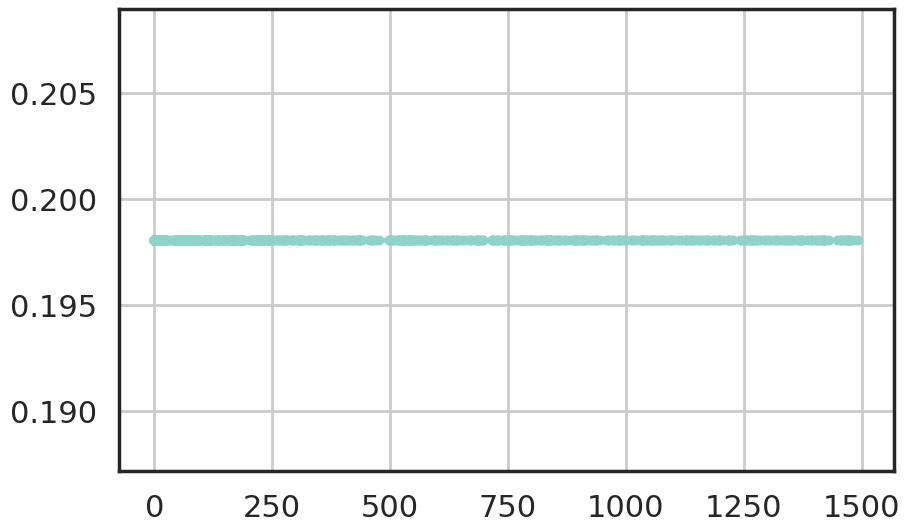

In [116]:
ice_plot(temp, 'PD', 200, best_search)

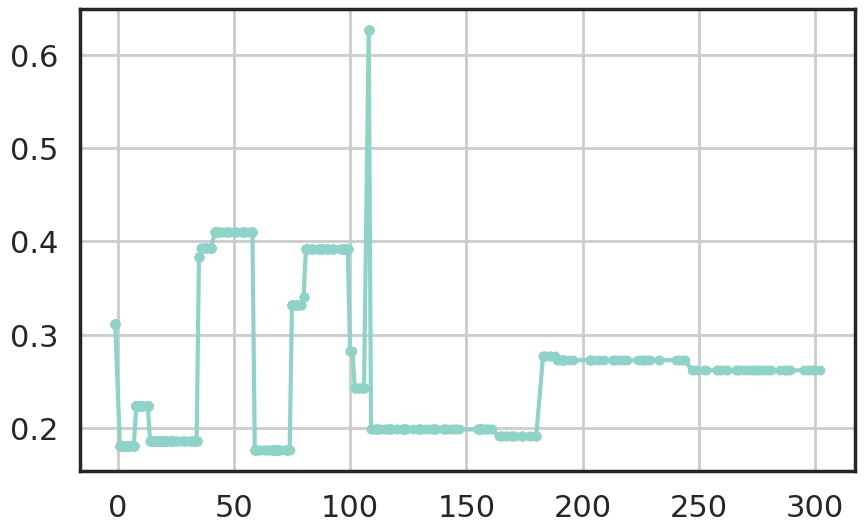

In [117]:
ice_plot(temp, 'MedDra_PT1', 200, best_search)

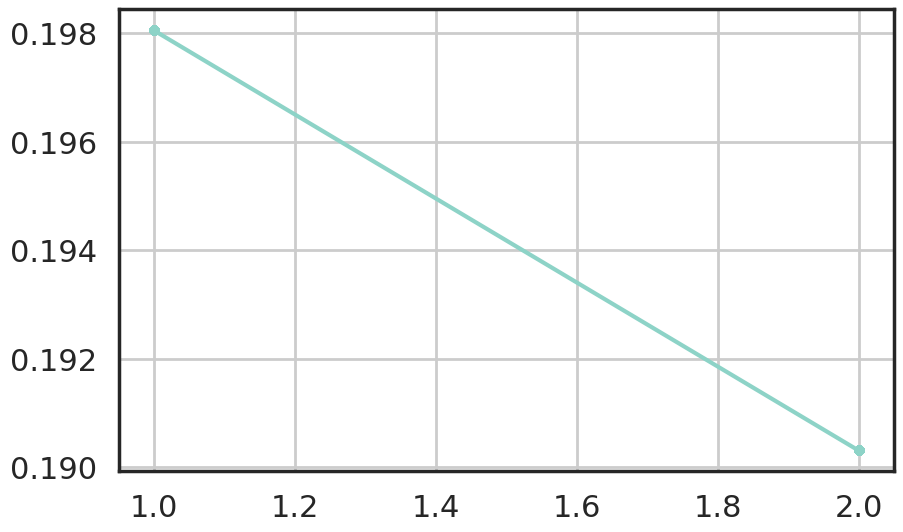

In [118]:
ice_plot(temp, 'AE_type', 200, best_search)

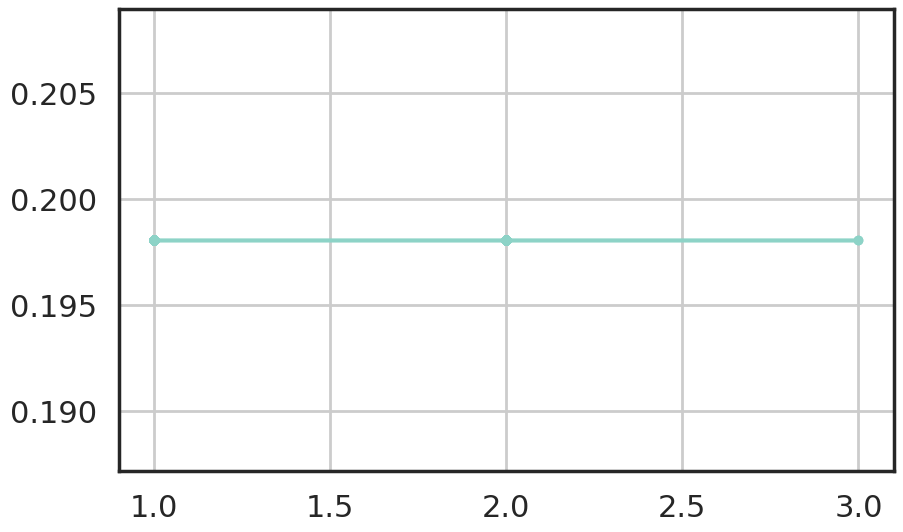

In [119]:
ice_plot(temp, 'Sex', 200, best_search)

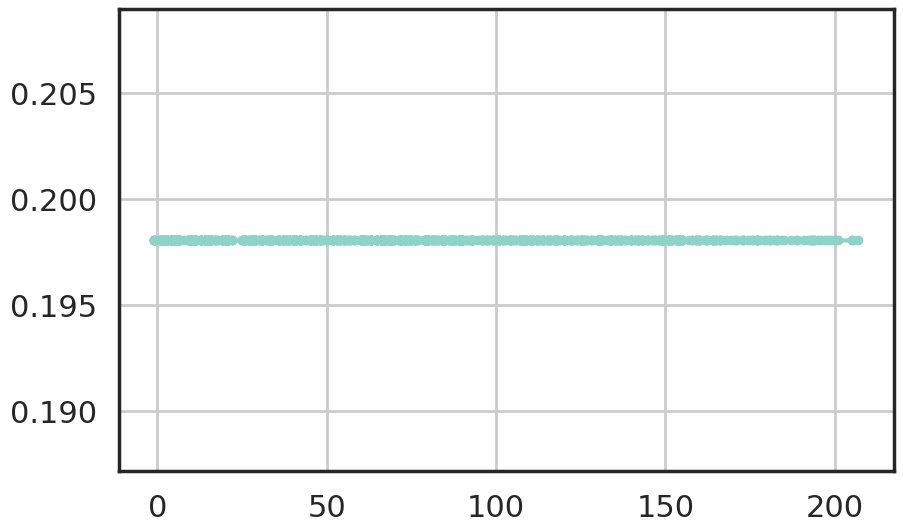

In [120]:
ice_plot(temp, 'Date_recieved', 200, best_search)